#### **Agenda:**
In this Lecture, we will learn about :
   - How aautonomous driving cars identify and detect location of different objects?
   - A new family of Object Detection Algoritms: Single Stage Detectors
   - 

## Problem Statement:
You are working as a Machine learning Engineer in Tesla as part of the Autonomous driving team focused on building prototype ML model to identify and detect location of:
- Traffic Lights, Stop signs
- Other Vehicles such as Car, Bicycles, Truck etc
- Pedestrian(People)
- Animals

on the road in realtime using the Camera installed in the deck of the owners car.

### Real time constraints:

- Our Object Detection Algorithm needs to be Fast enough to **run inference in RealTime** on commodity hardware(CPU only) and **highly accurate to ensure safety.**


Let's see how we can achieve this Balance using new family of Object Detection Algorithms: **Single Stage Detectors**.



<img src ='https://drive.google.com/uc?id=1Ty9Bjh4HiCgSbXbNQ8gTGA_z4ggxZbf8'>

### Object Detection with Single Stage Detectors:
* In the last lecture you learnt how **Object detection with two stage detectors** work.
* Despite being highly accurate, there are a few problems that ` Computer Visions practitioners found with Two Stage Detectors` that limited it's real-time Application.

### Problems with RCNNs?
1. The first is that **training required multiple phases**.
  - **First Region Proposal Network (RPN)** needed
to be trained in order to generate suggested bounding boxes.
  - Then we train the **actual classifier** to recognize objects in images.
2. The second issue is that **training took too long**. A **(Faster) R-CNN consists of multiple components**, including:
  - `A Region Proposal Network`
  - `A ROI Pooling Module`
  - `The final classifier`<br>
   While all three fit together into a framework, they are still moving parts that slow down the entire training procedure.
3. The final issue, and arguably most important, is **that inference time was too slow** — we could not yet **obtain real-time object detection with deep learning**.
  


### How can we fix these issues?
* This can be addressed by another family of object detection method known as **Single Stage Object Detection** algorithms:

**What is Single Stage Object Detection?**



*   Single-Stage Object Detectors are a class of object detection architectures 
that are one-stage.
*   
They treat object detection as a simple regression problem.

*   The input image fed to the network directly outputs the class probabilities and bounding box coordinates..

<img src = 'https://drive.google.com/uc?id=115zkzp-qKKsq8SRHU_WHGSpB2PbVl1FN'>



*    These models don't have the region proposal stage Region Proposal Network.

#### There are majorly two single Stage Detecion algorithms:
1. **SSD**: Single Shot Detector

2. **Yolo**: You Only Look Once

Let's Dive Deeper into Each one of them:

## Introduction to SSD:
- Original paper:  https://arxiv.org/pdf/1512.02325.pdf
- The **core idea behind the SSD network** is to have a **CNN** that takes **in an image as input and produce detections at different scales, shapes, and locations.**

 Let's understand this in detail:

Before understanding how SSD works and detect object at diffferent scales, First let's observe the architecture:

<img src = 'https://drive.google.com/uc?id=1XIPAzMX0-4kBwzBCNoKk3p46aLQHjvCv'>

### Architecture Details:

* SSD’s architecture builds on primarily **VGG-16 architecture(Known as Base Network)**, but discards the fully connected layers.
* We utilize the VGG layers up until conv_6 and
then **detach all other layers, including the fully-connected layers**.
* A set of **new CONV layers are then added to the architecture—these are the layers that make the SSD framework possible**.
*  As you can see from the diagram, each of these layers are **CONV layers as well** which means our Network is **Fully Convolutional**.


Another thing to observe in the architecture is :
1. We progressively **reduce the volume size in deeper layers**, as we would with a standard CNN.
2. Each of the **CONV layer connects to the final detection layer**.


* The **fact** that **each feature map(Conv Layer) connects to the final detection layer enabling the model to extract features at multiple scales and Size** and **progressively decrease the size** of the input to each subsequent layer.


### Deep Dive: How SSD Detect Object at different Scales, shapes and locations in a single forward pass:

<img src = 'https://drive.google.com/uc?id=1XmQCunLBUvN-DyChcncNwyVm8Ydu7RDJ'>

* To produce detections of different locations in the image, **the SSD Network uses Grid Detectors**.
* The `first two dimensions of the feature maps can be thought of as the grid size in which to divide the input image into`.
* Hence,  from above image you can see how last 2 Convoultion block of `5 * 5 and 3 * 3` divide the image into `5 * 5` and `3 * 3` **Grid** respectively.
* This allows the **SSD network** **to detect objects at different locations for each feature maps layer**.


Let's understand how B-Box prediction in SSD is done Next:


### MultiBox Regression:
- The bounding box regression technique of SSD is inspired by Szegedy’s work on MultiBox [https://arxiv.org/abs/1412.1441], a method for fast class-agnostic bounding box coordinate proposals. 
- Interestingly, in the work done on MultiBox an Inception-style convolutional network is used. 
- The 1x1 convolutions that you see below help in dimensionality reduction since the number of dimensions go down (but “width” and “height” remains the same)



<img src ='https://drive.google.com/uc?id=1P2F_2HMwTNzTwJCf3SaI8cUXV2ms4U1M'>

### MultiBox’s loss function combines two critical components that made their way into SSD:

- Confidence Loss: this measures how confident the network is of the objectness of the computed bounding box. Categorical cross-entropy is used to compute this loss.
- Location Loss: this measures how far away the network’s predicted bounding boxes are from the ground truth ones from the training set. L2-Norm is used here.

**multibox_loss = confidence_loss + alpha * location_loss**



* To **produce detections of different shapes** in the image, **the SSD Network uses Default Boxes**: a set of predefined box of different scales and size: 
*  There are `6 number of Default boxes` per feature map cell in the original paper, with its center placed at a certain offset from the grid cell (usually center).

### Producing Detections

<img src ='https://drive.google.com/uc?id=194_KBdERJlVI_1Z7Xr_iO8O4cj_X7vtN'>

* You have seen how SSD takes input image and able to locate object **at different shapes, scales and locations**.
* Now, all these feature maps are directly connected to **Detection Module.**
* Each Feature Map is passed to **Detection module** and **Multiclass Classification + Bounding Box Regressor** is performed on each feature map to give results on image of `different shapes ,scales and locations.`


#### For Tensorflow Code Implementation of SSD, you can refer to:
https://github.com/balancap/SSD-Tensorflow

### Beyond SSD:

- There has been a lot of research in Single Stage Detection methods. 
- Next we are going to learn the most popular **Single Shot Detector** known as **YOLO**.

## Introduction to YOLO algorithm
As its name suggests, YOLO (You Only Look Once) applies a single forward pass neural network to the whole image and predicts the bounding boxes and their class probabilities as well. 

This technique makes YOLO quite fast without losing a lot of accuracies.

### Version history of Yolo:

Let's see the version history of YoLO:
- In 2015, Redmon J et al. Proposed the YOLO network, which is characterized by combining the candidate box generation and classification regression into a single step 
   - original paper: [https://arxiv.org/abs/1506.02640]. 
- Proposed architecture accelerated the speed of target detection, frame rate up to 45 fps! When predicting, the feature map is divided into 7x7 cells, and each cell is predicted, which significantly reduces the calculation complexity.

Yolo V2:
- After a one year, Redmon J once proposed an improvised version: YOLO9000 also known as YoloV2, Compared to the previous generation, the mAP on the VOC2007 test set increased from 67.4% to 78.6%. - However, in yoloV2 as well a single cell is only responsible for predicting a single object facing the goal of overlap, the recognition was not good enough.
[https://arxiv.org/abs/1612.08242]

In April 2018, the author released the third version of YOLOv3:
- Paper: [https://arxiv.org/abs/1804.02767?e05802c1_page=1]
- The mAP-50 on the COCO dataset increased from 44.0% of YOLOv2 to 57.9%. 
- Compared with RetinaNet the state of the art at that time with 61.1% mAP, the detection speed is about 98 ms/frame, while YOLOv3 has 29 ms/frame when the input size is 416x416 resulting in better speed to accuracy tradeoff.
- Code: https://pjreddie.com/darknet/yolo/

- Redmon stopped his research on Object-Detection and Yolo over concerns of his research being used for Military Purpose.

Yolo V4:
- In 2020, Bochkovskiy et al. took over YOLO Research and released YoloV4 and it achieved state-of-the-art results: 43.5% mAP (65.7% mAP50) on the MS COCO dataset at a real-time speed of ∼65 FPS on the Tesla V100 GPU.
- Paper: [https://arxiv.org/abs/2004.10934]
- Code: https://github.com/AlexeyAB/darknet

Yolo V5:
- Within just two months of V4 Release, Ultralytics open sourced controversial YoloV5 without any official peer reviewed research paper, developed using pytorch framework unlike it's predecessors which used Darknet framework. However it soon gained popularity among applied community and is currently goto framework for real-time Computer Vision Applications.
- Code: [https://github.com/ultralytics/yolov5]

There has been further advancements and version releases such as Scaled YoloV4, PP-Yolo, YoloX, YoloR and Recently launched YoloV6 and V7

Detailed Timeline is given below:

<img src ='https://drive.google.com/uc?id=1aCVxSVVZ1wzBcgouFPN78hYvKXLFWQP9'>

#### We will deep dive into YOLO V3 as it serves as the Major Inspiration and baseline from which all version of Yolo has Evolved:

#### The Idea behind YOLO v3:
The author treats the object detection problem as a regression problem in the YOLO algorithm and divides the image into an S × S grid. If the center of a target falls into a grid, the grid is responsible for detecting the target

<img src = 'https://drive.google.com/uc?id=1hQ_og5QBrwF2Dt4JsO2-bsGlCK8TaBLm'>

Each grid will output a bounding box, confidence, and class probability map. Among them:

- The bounding box contains four values: x, y, w, h, (x, y) represents the center of the box. (W, h) defines the width and height of the box;
- Confidence indicates the probability of containing objects in this prediction box, which is the IoU value between the prediction box and the actual box;
- The class probability indicates the class probability of the object, and the YOLOv3 uses a two-class method
 

<img src = 'https://drive.google.com/uc?id=1TKKpxK7MM5ZeArt8K1tcVYk_U3F-IvTz'>


### Simple YOLO Architecture:
<img src = 'https://drive.google.com/uc?id=1cwO_EaWkDDAVVpdVietNpv2MoAy9QoXe'>

### Yolo V3 Architecture details:

<img src ='https://drive.google.com/uc?id=1u0N9K9QuHDlxLhxD5bAppE-ubIjSsrrW'>

As mentioned in the [original paper](https://pjreddie.com/media/files/papers/YOLOv3.pdf), YOLOv3 has 53 convolutional layers called Darknet-53 is shown in the bellow image. The figure is mainly composed of Convolutional and Residual structures. It should be noted that the last three layers Avgpool, Connected, and softmax layer, are used for classification training on the Imagenet dataset. When using the Darknet-53 layer to extract features from the picture, these three layers are not used:

<img src = 'https://drive.google.com/uc?id=1SFJralLa4OU3MfZ_BJIPuBJK--5Eiik6'>

The reason behind picking darknet-53 as the backbone was:
1. Darkent53 was comparable to the most advanced classifiers talking about accuracy, and it has fewer floating-point operations and the fastest calculation speed. Compared with ResNet-101, the speed of the Darknet-53 network is 1.5 times that of the former; although ReseNet-152 and its performance are similar, it takes more than two times.
2. it has highest measurement floating-point operation per second, which means that the network structure can better use the GPU, thereby making it more efficient and faster.

<img src ='https://drive.google.com/uc?id=1m0xSJsJnIok5O9Na2LNiw7fNSB9gOk6K'>

**YOLO in easy steps:**
1. Divide the image into multiple grids. For illustration, I have drawn 4x4 grids in above figure.
2. Label the training data as shown in the above figure.
  * If **C is number of unique objects** in our data, `S*S is number of grids into which we split our image`, then our output vector will be of length `S*S*(C+5)`.
  * **For e.g.** in above case, our target vector is 4x4x(3+5) as we divided our images into 4*4 grids and are training for `3 unique objects: Car, Light and Pedestrian`.

3. Make one deep convolutional neural net with **loss function as error between output activations and label vector**.
  * Basically, `the model predicts the output of all the grids in just one forward pass of input image through ConvNet`.
4. **Keep in mind that the label for object being present in a grid cell (P.Object) is determined by the presence of object’s centroid in that grid.** 
  * This is important to not allow one object to be counted multiple times in different grids.

The **main advantage Of YOLO** is, it is  very **fast** as the model predicts the output of all the grids in just `one forward pass of input image through ConvNet.`

### What is the difference between SSD vs YOLO? (Optional)

* Both detect images in a single pass, but Yolo uses two fully connected layers while the SSD uses multiple convolutional layers.
* The `SSD model adds several feature layers to the end of a base network`, which predicts the offsets to default boxes of different scales and aspect ratios and their associated scores.
* Yolo uses Anchor Boxes for detection object of different scale and aspect Ratio





The below image compares the **SSD model** with a **YOLO model**.

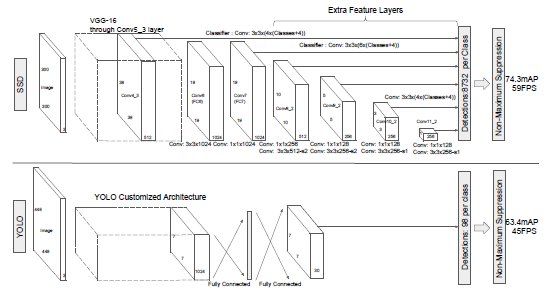

* You have seen how **Single Shot Detectors** like **SSD and YOLO Works**.

### Let's go back to our problem statement and see how we can using Pre-Trained YoloV5 to solve it:

Why YOLO V5:
- We are going to use pre-trained Yolo V5 models for our use case since they are trained using COCO-Dataset (https://cocodataset.org/#home) and already contain the Target-Classes which we want to Detect:
      - 'Car' , 'motorbike','aeroplane', 'bus',  'truck'
      - Traffic light
      - Person
      - so on..

- Due to it's choice of framework being pytorch it's highly popular in Applied CV Community
- Pytorch models can be easily migrated to other frameworks such as onnx, tensorflow.
- It's faster than YoloV4 and has 5 checkpoints for different memory and speed requirements.

- For more details Check this blog:
https://blog.roboflow.com/yolov5-is-here/

- We will be using ONNX Format of YoloV5

#### What is ONNX?

ONNX is an open format built to represent machine learning models. ONNX defines a common set of operators - the building blocks of machine learning and deep learning models - and a common file format to enable AI developers to use models with a variety of frameworks, tools, runtimes, and compilers

Using ONNX, solution developed using one framework can be easily deployed in another framework and vice versa.


[https://onnx.ai/]


#### Let's Start with downloading the dataset and explore:

In [ ]:
!gdown 1Y5OHRq4KPVZuvY2BnuUnsEXq9o_GuzBM

Downloading...
From: https://drive.google.com/uc?id=1Y5OHRq4KPVZuvY2BnuUnsEXq9o_GuzBM
To: /content/selfdriving cars data.zip
100% 946M/946M [00:08<00:00, 107MB/s] 


In [ ]:
!ls

 sample_data  'selfdriving cars data.zip'


In [ ]:
!unzip -q '/content/selfdriving cars data.zip'

In [ ]:
!ls 'selfdriving cars data'

images	labels_train.csv  labels_trainval.csv  labels_val.csv


In [ ]:
from glob import glob

print("Sample Images: ")
glob('/content/selfdriving cars data/images/*jpg')[:5]

Sample Images: 


['/content/selfdriving cars data/images/1478899035854106975.jpg',
 '/content/selfdriving cars data/images/1478020383696274836.jpg',
 '/content/selfdriving cars data/images/1478732702893512106.jpg',
 '/content/selfdriving cars data/images/1478900302974589393.jpg',
 '/content/selfdriving cars data/images/1479499538043380876.jpg']

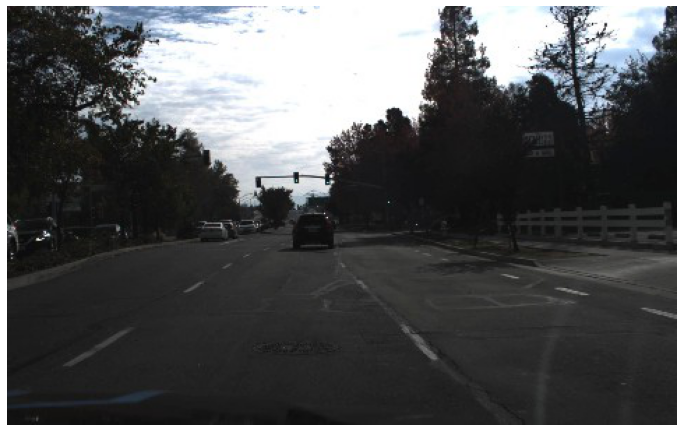

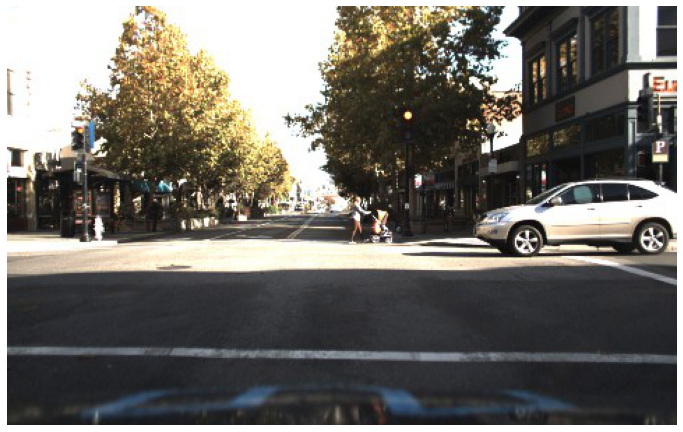

In [ ]:
## let's plot top two images in dataset
import matplotlib.pyplot as plt

for image_path in glob('/content/selfdriving cars data/images/*jpg')[:2]:
  plt.figure(figsize=(12,8))
  img = plt.imread(image_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()


### Let's get the Model Files and config as well:

In [ ]:
!gdown 1g7BocB3bO9l3qk8pzBmn7F32A9ib3Tf2

Downloading...
From: https://drive.google.com/uc?id=1g7BocB3bO9l3qk8pzBmn7F32A9ib3Tf2
To: /content/YoloV5_ONNX.zip
100% 31.3M/31.3M [00:00<00:00, 60.7MB/s]


In [ ]:
!unzip -q '/content/YoloV5_ONNX.zip'

In [ ]:
ls

 coco.names.txt  'selfdriving cars data'/      YoloV5_ONNX.zip
 __MACOSX/       'selfdriving cars data.zip'   yolov5s.onnx
 sample_data/     yolov5n.onnx


- The files ending with ONNX are our saved Model Files. 
- coco.names contains all the 90 Class Labels which were used to train the Yolo Model.

Let's checkout the content of coco.names file:

In [ ]:
# Load class names.
classesFile = "/content/coco.names.txt"
classes = None

with open(classesFile, 'rt') as f:
      classes = f.read().rstrip('\n').split('\n')

# print ID and value of classes in COCO
print(dict(enumerate(classes)))

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorbike', 4: 'aeroplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'sofa', 58: 'pottedplant', 59: 'bed', 60: 'diningtable', 61: 'toilet', 62: 'tvmonitor', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'mi

As You can see it contains 90 different classes of which some are similar to what we want to detect in our Use-Case

#### Let's setup config for model

In [ ]:
import cv2 
import numpy as np

# input image width and height
INPUT_WIDTH = 640
INPUT_HEIGHT = 640

# probability threshold to filter boxes with object or no object
OBJECT_SCORE_THRESHOLD = 0.5

# # probability threshold to detect and Assign Class
CLASS_CONFIDENCE_THRESHOLD = 0.45

# IOU AREA Threshold to suppress redundant boxes using NMS
NMS_THRESHOLD = 0.45

# Text parameters used for annotating label on Image
FONT_FACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.4
THICKNESS = 1
BOX_COLOR = (0,255,255)
FONT_COLOR= (0,0,0)


In [ ]:
def draw_label(im, label, x, y):
    """Function used for Drawing text/label onto image at location."""

    # Get text size.
    text_size = cv2.getTextSize(label, FONT_FACE, FONT_SCALE, THICKNESS)
    dim, baseline = text_size[0], text_size[1]

    # Use text size to create a BLACK rectangle.
    cv2.rectangle(im, (x,y), (x + dim[0], y - (dim[1]+baseline) ), (255,255,255), cv2.FILLED);

    # Display text inside the rectangle.
    cv2.putText(im, label, (x, y - dim[1]+baseline ), FONT_FACE, FONT_SCALE, FONT_COLOR, THICKNESS, cv2.LINE_AA)

In [ ]:
def yolo_forward_pass(input_image, net):
      """Performs forward pass to generate prediction using image and Loaded Yolo Model as parameters """
      # Create a 4D blob from a frame
      blob = cv2.dnn.blobFromImage(input_image, 1/255,  (INPUT_WIDTH, INPUT_HEIGHT), [0,0,0], 1, crop=False)

      # Sets the input to the network.
      net.setInput(blob)

      # Run the forward pass to get output of the output layers.
      outputs = net.forward(net.getUnconnectedOutLayersNames())

      return outputs 

In [ ]:
def post_process_outputs(input_image, outputs):
      """ Takes Model Prediction outputs from forward pass function and performs post-processing tasks:
      1. Removing predictions with Low Confidence score
      2. Filtering only classes required for our task such as Vehicles, Human, traffic light stop sgn etc
      3. Perform NMS to suppress redundant or Duplicate boxes
      4. Annotate/draw remaining boxes on the Image
      """
      # Lists to hold respective values while unwrapping.
      class_ids = []
      confidences = []
      boxes = []

      # Rows
      rows = outputs[0].shape[1]
      image_height, image_width = input_image.shape[:2]

      # Resizing factor.
      x_factor = image_width / INPUT_WIDTH
      y_factor =  image_height / INPUT_HEIGHT

      # Iterate through detections.
      for r in range(rows):
            row = outputs[0][0][r]
            confidence = row[4]

            # Discard bad detections and continue.
            if confidence >= OBJECT_SCORE_THRESHOLD:
                  classes_scores = row[5:]

                  # Get the index of max class score.
                  class_id = np.argmax(classes_scores)

                  #  Continue if the class score is above threshold.
                  if (classes_scores[class_id] > CLASS_CONFIDENCE_THRESHOLD):
                        confidences.append(confidence)
                        class_ids.append(class_id)
                        cx, cy, w, h = row[0], row[1], row[2], row[3]

                        left = int((cx - w/2) * x_factor)
                        top = int((cy - h/2) * y_factor)
                        width = int(w * x_factor)
                        height = int(h * y_factor)

                        box = np.array([left, top, width, height])
                        boxes.append(box)
               
      # filter redundant Boxies using NMS Threshold                 
      indices = cv2.dnn.NMSBoxes(boxes, confidences, CLASS_CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

      # plot remaining boxes
      for i in indices:
            box = boxes[i]
            left = box[0]
            top = box[1]
            width = box[2]
            height = box[3]            

            # Draw bounding box.            
            cv2.rectangle(input_image, (left, top), (left + width, top + height), BOX_COLOR, 2*THICKNESS)

            # Class label.                     
            label = "{}:{:.2f}".format(classes[class_ids[i]], confidences[i])             

            # Draw label.            
            draw_label(input_image, label, left, top)

      return input_image


In [ ]:
sample_images = ['/content/selfdriving cars data/images/1478732518231513348.jpg',
 '/content/selfdriving cars data/images/1478900224707428956.jpg',
 '/content/selfdriving cars data/images/1478898970726449449.jpg',
 '/content/selfdriving cars data/images/1478895374457789828.jpg',
 '/content/selfdriving cars data/images/1479504796899191419.jpg',
 '/content/selfdriving cars data/images/1479498467969466999.jpg']

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


# Load class names.
classesFile = "/content/coco.names.txt"
classes = None

with open(classesFile, 'rt') as f:
      classes = f.read().rstrip('\n').split('\n')

# Load the model using cv2.dnn.readNet: Yolo V5 Nano Model
modelWeights = "/content/yolov5n.onnx"
net = cv2.dnn.readNet(modelWeights)

for image_path in sample_images:
  # Load image
  frame = cv2.imread(image_path)


  # Process image:
  detections = yolo_forward_pass(frame, net)
  pred_img = post_process_outputs(frame.copy(), detections)

  """
  Annotate efficiency information. The function getPerfProfile returns the overall time for inference(t)
  and the timings for each of the layers(in layersTimes).
  """
  t, _ = net.getPerfProfile()
  label = 'Inference time: %.2f ms' % (t * 1000.0 /  cv2.getTickFrequency())
  cv2.putText(pred_img, label, (10, 20), FONT_FACE, FONT_SCALE,  (255, 0, 50), THICKNESS, cv2.LINE_AA)
  
  fig = plt.figure(figsize=(28,16))
  ax1 = fig.add_subplot(1,2,1)
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB )
  ax1.imshow(frame)
  ax1.axis('off')


  ax2 = fig.add_subplot(1,2,2)
  pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB )
  ax2.imshow(pred_img)
  ax2.axis('off')
  
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

- It did a great job of predicting Vehicles and Traffic light with just the pre-trained model and 
- Every image was processed in less than a Second on CPU without any specialized hardware(1000 ms = 1 second).
- To Enhance performance we can finetune the model on our custom dataset as well.

### Question:
    - Try tuning Score threshild and Class threshold probabilities and check impact on predictions.
    - Evaluate MAP of the pre-trained model on full dataset
    - Run inference using Other Variants of Yolo Model and compare performance in terms of Latency and Accuracy/MAP
    - Fine tune the model on dataset and compare performance with Pre-Trained Model in terms of MAP.


### Conclusion:
- Using Single Stage Detection method specifically pre-trained YOLOV5 Model, we developed a very fast and accurate detector for our use case which can run inferences in Real Time (few 100 milliseconds).


- Yolo Models are super fast and accurate for majority of real-time Applications, However there's one area where YoLO models struggle: Detecting very Small and Sparse objects(Hard Detection) such as object from Satellite Images.




### Video Inference: (Optional)

Let's Run our Inference on Video:

In [ ]:
#https://drive.google.com/file/d/1KyOIRWMBE-oX7em0bhTPkBbbM5mAlKII/view?usp=sharing
!gdown 1KyOIRWMBE-oX7em0bhTPkBbbM5mAlKII

Downloading...
From: https://drive.google.com/uc?id=1KyOIRWMBE-oX7em0bhTPkBbbM5mAlKII
To: /content/Vid_Self-Driving_Demo.mp4
100% 41.4M/41.4M [00:00<00:00, 100MB/s]


In [ ]:
!ls

 coco.names.txt  'selfdriving cars data'       yolov5n.onnx
 __MACOSX	 'selfdriving cars data.zip'   YoloV5_ONNX.zip
 sample_data	  Vid_Self-Driving_Demo.mp4    yolov5s.onnx


In [ ]:
import cv2

# path where video is stored
vid_path = 'Vid_Self-Driving_Demo.mp4'


In [ ]:
## Count number of Frames for progress Bar
def count_frames(video_path, manual=False):
  '''
  This function calculate total count of frames in video
  '''
  def manual_count(handler):
      frames = 0
      while True:
          status, frame = handler.read()
          if not status:
              break
          frames += 1
      return frames 

  stream = cv2.VideoCapture(video_path)
  # Slow, inefficient but 100% accurate method 
  if manual:
      frames = manual_count(stream)
  # Fast, efficient but inaccurate method
  else:
      try:
          frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
      except:
          frames = manual_count(cap)
  stream.release()
  return frames


frame_count = count_frames(vid_path, manual=True)
print("Total Frames: ", frame_count)

Total Frames:  2801


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
from tqdm.auto import tqdm

stream = cv2.VideoCapture(vid_path)
ret, img_src = stream.read()

output = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'DIVX'),30 , (img_src.shape[1],img_src.shape[0]))


# Load class names.
classesFile = "/content/coco.names.txt"
classes = None

with open(classesFile, 'rt') as f:
      classes = f.read().rstrip('\n').split('\n')


# Load the model using cv2.dnn.readNet: Yolo V5 Small
modelWeights = "/content/yolov5s.onnx"
net = cv2.dnn.readNet(modelWeights)


# Initiate the progress bar
with tqdm(total=frame_count-1) as pbar:
  # start looping over video stream to extract frame and run inference
  while True:
      # Read frame from camera
      ret, image_np = stream.read()
      if not ret:
        break

      # Load image
      frame = cv2.imread(image_path)

      # Process image:
      detections = yolo_forward_pass(image_np, net)
      img = post_process_outputs(image_np.copy(), detections)

      """
      Annotate efficiency information. Method getPerfProfile of net object returns the overall time for inference(t)
      and the timings for each of the layers(in layersTimes).
      """
      t, _ = net.getPerfProfile()
      label = 'Inference time: %.2f ms' % (t * 1000.0 /  cv2.getTickFrequency())
      cv2.putText(img, label, (10, 20), FONT_FACE, FONT_SCALE,  (0, 255, 200), THICKNESS, cv2.LINE_AA)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      

      # Display output: Doesn't work in colab Environment: Uncomment to play the follwing video in standard environment
      #cv2.imshow( cv2.resize(image_np_with_detections, (800, 600)))
      output.write(img)

      # update the progress bar
      pbar.update(1)

      if cv2.waitKey(25) & 0xFF == ord('q'):
          break

  stream.release()
  output.release()
  cv2.destroyAllWindows()
  print("Processing Complete. Download and Play the Video File named 'Output.mp4' ")

  0%|          | 0/2800 [00:00<?, ?it/s]

Processing Complete. Download and Play the Video File named 'Output.mp4' 


In [ ]:
ls

 coco.names.txt  'selfdriving cars data'/      YoloV5_ONNX.zip
 __MACOSX/       'selfdriving cars data.zip'   yolov5s.onnx
 output.mp4       Vid_Self-Driving_Demo.mp4
 sample_data/     yolov5n.onnx


In [ ]:
from google.colab import files
files.download('output.mp4') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Note that Every Second of a Video Contains 24+ Frames i.e. 24 Images so it might take around 20 mins to process the whole video on CPU. 

- We can sample a small number of frames from every second depending on the speed of Change in Business-case at hand to make video inference Even Faster.

- Demo on working video:
https://drive.google.com/file/d/1QAMcZSNjJDqVTnFEDR0RRFFa5COJ5ay-/view?usp=sharing

### Disadvantage of Single Stage Models and need for retinanet:
#### Class imbalance problem
* Both **one stage detection methods**, like **SSD and YOLO** evaluate **almost 10^4 to  10^5 candidate locations per image**.
* But only a few locations contain objects (i.e. Foreground) and rest are just background objects. 
* **This leads to class imbalance problem.**

`And this turn out to be the central cause of making performance of one stage detectors inferior`

* Small objects and close-by objects may be missed by YOLO like algorithms

Hence , researchers have **introduced RetinaNet Model.** 
To learn more about Retina Net, refer to the post read Notebook:
https://drive.google.com/file/d/1cg42_iwvzeyC-3OPcvel4-i0F00_4snG/view?usp=sharing